# WBCD dataset: Degeneration effect - repeated avatarization 

In order to look at the effect of an avatarization, we repeat the avatarization on an avatar dataset with `k = 20`.  

This notebook visualize avatarization results of the WBCD dataset over iteration.  
To visualize the results, we display the FAMD projection in the original data space of avatars.

## Packages import 

In [3]:
# Main importation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch



import matplotlib.transforms as transforms
from matplotlib import patches, pyplot as plt
import saiph
import sys
import math


## Data loading

In [4]:
df = pd.read_csv("../../datasets/WBCD/breast_cancer_wisconsin.csv")
df.drop(columns = "Sample_code_number", inplace = True)
df["iter"] = 0

df = df.astype("category")
df_list = [df]

In [5]:
df_all = pd.read_csv("../../datasets/messageD/wbcd.csv")

In [6]:
df_all.Class = df_all.Class.astype("object")

In [7]:
df_0 = df_all[df_all["iter"] == 0]  # original data
df_1 = df_all[df_all["iter"] == 1]
df_2 = df_all[df_all["iter"] == 2]
df_3 = df_all[df_all["iter"] == 3]
df_5 = df_all[df_all["iter"] == 5]
df_7 = df_all[df_all["iter"] == 7]
df_10 = df_all[df_all["iter"] == 10]


df_0.drop(columns = "iter", inplace = True)
df_1.drop(columns = "iter", inplace = True)
df_2.drop(columns = "iter", inplace = True)
df_3.drop(columns = "iter", inplace = True)
df_5.drop(columns = "iter", inplace = True)
df_7.drop(columns = "iter", inplace = True)
df_10.drop(columns = "iter", inplace = True)


/tmp/ipykernel_59105/571312845.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0.drop(columns = "iter", inplace = True)
/tmp/ipykernel_59105/571312845.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(columns = "iter", inplace = True)
/tmp/ipykernel_59105/571312845.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop(columns = "iter", inplace = True)
/tmp/ipykernel_59105/571312845.py:13: SettingWithCopyWa

## Graphical parameters

In [8]:
colors = pd.read_csv("../../color.csv", index_col = 0)

## Multdimensionnal projection function.

This section use projection function (such as FAMD) to project the avatar data in the original data space.

In [9]:
def projection_plot(records_set, avatars_set, variable_visualization, iter, colors = colors, ax=None) :

    # perform projection
    coord, mod, param = saiph.fit(records_set, nf = 2) 
    avat_coordinates = saiph.transform(avatars_set, mod , param) # project avatar in the original space 
    var1 = mod.explained_var_ratio[0] * 100
    var2 = mod.explained_var_ratio[1] * 100

    avat_coordinates["modality"] = avatars_set[variable_visualization].values

    # general set up 
    paper_rc = {"lines.markersize": 11}
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale = 2, rc = paper_rc)
    with plt.style.context("seaborn-whitegrid"):
        plt.rcParams["axes.edgecolor"] = "0.15"
        plt.rcParams["axes.linewidth"] = 1.25
        plt.rcParams["font.family"] = "sans-serif"
        plt.rcParams["font.sans-serif"] = ["Helvetica"]

    ax1 = ax or plt.gca()
    # add scatterplot
    sns.scatterplot(
        x = "Dim. 1",
        y = "Dim. 2",
        data = avat_coordinates,
        hue = "modality",
        alpha = 1,
        size = 0.5,
        palette = [colors.loc["benign", "color"], colors.loc["malignant", "color"]],
        edgecolor = "#1D1D1B",
        ax= ax1
    )
    
    # setup x, y limits, labs and legend
    # ax1.set_xlim(coord["Dim. 1"].min() - 0.2, coord["Dim. 1"].max() + 0.2)
    # ax1.set_ylim(coord["Dim. 2"].min() - 0.2, coord["Dim. 2"].max() + 0.2)
    ax1.set_xlabel("Dim. 1 (" + str(round(var1, 2)) + "%)")
    ax1.set_ylabel("Dim. 2 (" + str(round(var2, 2)) + "%)")
    ax1.set(xlim = (-3, 7.5))
    ax1.set(ylim = (-2.2, 4.9))

    ax1.get_legend().remove()

    ax1.set_title("Iteration: {}".format(iter))
    return ax1

## Iterations vizualisation

Here we iterate the visualization over avatar generations.

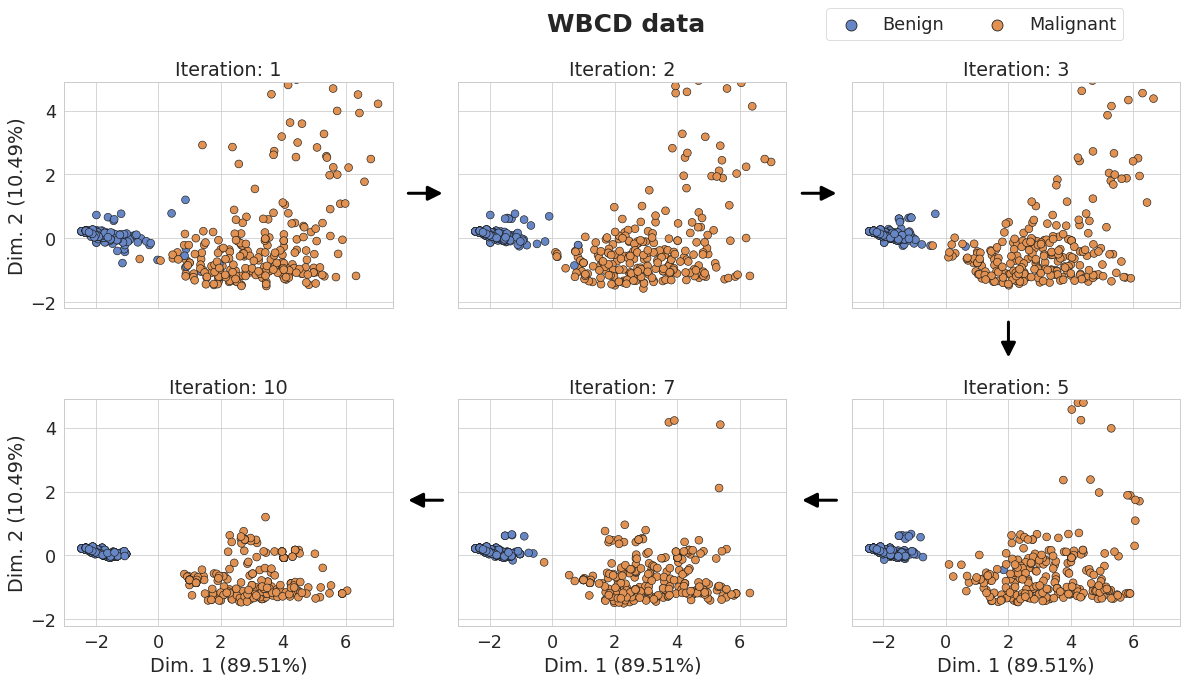

In [10]:
# Visualization context
paper_rc = {"lines.markersize": 11}
sns.set_style("whitegrid")
sns.set_context("paper", font_scale = 2, rc = paper_rc)
with plt.style.context("seaborn-whitegrid"):
        plt.rcParams["axes.edgecolor"] = "0.15"
        plt.rcParams["axes.linewidth"] = 1.25
        plt.rcParams["font.family"] = "sans-serif"
        plt.rcParams["font.sans-serif"] = ["Helvetica"]
fig, axs = plt.subplots(2, 3, figsize = (20, 10))

# Link each avatar dataframe to the correct subpot
list = [(df_1, 1, axs[0, 0]),
        (df_2, 2, axs[0, 1]),
        (df_3, 3, axs[0, 2]),
        (df_5, 5, axs[1, 2]),
        (df_7, 7, axs[1, 1]),
        (df_10, 10, axs[1, 0])]

# Avatar projection in the original space
for df_temp in list:
    projection_plot(df_1, df_temp[0], "Class", df_temp[1], ax = df_temp[2])
    


## Add arrow from one subplot to the other
# get arrows position
axs_list = [ axs[0, 0],  axs[0, 1],  axs[0, 2],  axs[1, 2],  axs[1, 1],  axs[1, 0]]
xy_list = [([8, 1.7], [-3.5, 1.7]), ([8, 1.7], [-3.5, 1.7]), ([2, -2], [2, 5.5]), 
           ([-3.5, 1.4], [8, 1.4]), ([-3.5, 1.4], [8, 1.4])]

# Draw arrows
for i in range(len(axs_list)-1):
    xyA = xy_list[i][0]
    xyB = xy_list[i][1]
    
    axs_list[i].plot(*xyA)
    axs_list[i+1].plot(*xyB)

    transFigure = fig.transFigure.inverted()
    coord1 = transFigure.transform(axs_list[i].transData.transform(xyA))
    coord2 = transFigure.transform(axs_list[i+1].transData.transform(xyB))
    arrow = patches.FancyArrowPatch(
        coord1,  # posA
        coord2,  # posB
        shrinkA=0,  # so tail is exactly on posA (default shrink is 2)
        shrinkB=0,  # so head is exactly on posB (default shrink is 2)
        transform=fig.transFigure,
        color="black",
        arrowstyle="-|>",  # "normal" arrow
        mutation_scale=30,  # controls arrow head size
        linewidth=3,
    )
    fig.patches.append(arrow)

# Add space between each subplot
plt.subplots_adjust(hspace=0.4, wspace=0.2)

# put label outer the axis 
for ax in fig.get_axes():
    ax.label_outer()

# Add the legend
handles, _ = ax.get_legend_handles_labels()
for ha in handles:
    ha.set_edgecolor("#1D1D1B")
fig.legend(loc = (0.695, 0.94), labels = ["Benign", "Malignant"], handles = handles[:], ncol=2)

# General title
plt.gcf().text(0.46, 0.95, "WBCD data", fontsize=25, weight = 'bold', family = "sans-serif")

# Save figure if necessary
# plt.savefig("../../figure/wbcd_MESSAGED/wbcd_iterations.svg", format = "svg")fig, ax = plt.subplots(figsize=(7,5))


plt.show()


##  Perform variability conservation

In [11]:
def compute_metrics(ref_df, df, results): 
    """Compute metrics of variability variation between reference and avatarized Dataframe."""
    coord, model, param = saiph.fit(ref_df.drop(columns=["iteration", "repetition"]), nf = 2) 
    avat_coordinates = saiph.transform(df.drop(columns=["iteration", "repetition"]), model, param) # project avatar in the original space
    
    for dimension in ["Dim. 1", "Dim. 2"]:
        # All class
        standard_deviation = avat_coordinates[dimension].std()
        std_original = coord[dimension].std()
        raw = [standard_deviation/std_original, standard_deviation, df["iteration"].unique()[0], "all", dimension,  df["repetition"].unique()[0]]
        results.append(raw)

        # by class
        for type in (2, 4):
            standard_deviation = avat_coordinates[df["Class"] == type][dimension].std()
            std_original = coord[ref_df["Class"] == type][dimension].std()
            raw = [standard_deviation/std_original, standard_deviation, df["iteration"].unique()[0], type, dimension, df["repetition"].unique()[0]]
            results.append(raw)

    return results




In [12]:
dfs = pd.read_csv("../../datasets/WBCD/iterations.csv")
dfs.drop(columns="Unnamed: 0", inplace=True)
dfs.head()
init = []
init = compute_metrics(
            dfs[dfs["iteration"] == 0],
            dfs[dfs["iteration"] == 0],
            results=init, 
            )

results = []
for iteration in range(1, 11): 
    for repetition in range(1,11): 
        subset = dfs[(dfs["iteration"] == iteration) & (dfs["repetition"] == repetition)]
        results = compute_metrics(
            dfs[dfs["iteration"] == 0],
            subset,
            results=results, 
        )


results = init + results


In [13]:
dfs

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,iteration,repetition
0,5,1,1,1,2,1,3,1,1,2,0,0
1,5,4,4,5,7,10,3,2,1,2,0,0
2,3,1,1,1,2,2,3,1,1,2,0,0
3,6,8,8,1,3,4,3,7,1,2,0,0
4,4,1,1,3,2,1,3,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68978,5,3,3,3,3,5,3,8,1,4,10,10
68979,2,1,1,1,2,1,1,1,1,2,10,10
68980,6,10,10,2,8,10,7,3,3,4,10,10
68981,10,4,5,3,6,10,7,10,1,4,10,10


In [14]:
results = pd.DataFrame(results, columns=["percentage", "std", "iteration", "modality", "dimension", "repetition"])
results["percentage"] = results["percentage"] * 100

In [17]:
def plot_variability_percentage(data, dimension, y, y_label, axs):

    axs = axs or plt.gca()
    sns.lineplot(data=data[data["dimension"] == dimension], 
                x="iteration", 
                y=data[y], 
                hue="modality", 
                ci = 95, 
                palette = ["green", colors.loc["benign", "color"] , colors.loc["malignant", "color", ]],
                ax=axs
                )
    axs.set(
        title=dimension
        )
    axs.get_legend().remove()
    if y == "percentage":
        axs.set_ylim(37, 103)

    if y == "std":
        axs.set_ylim(0, 2.7)

    axs.set_ylabel(y_label)
    fig.suptitle("Variability conservation across avatarization iterations")


/tmp/ipykernel_59105/2740076110.py:19: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


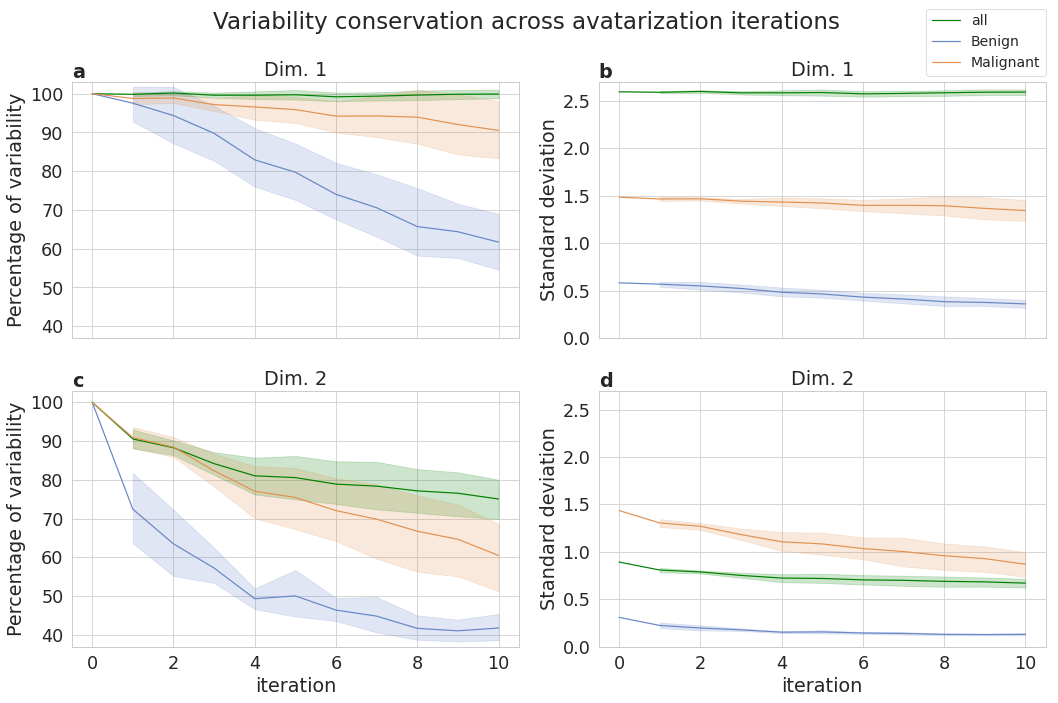

In [19]:

fig, axs = plt.subplot_mosaic([['a', 'b'], ['c', 'd'],],
                              constrained_layout=True, figsize = (15, 10), sharex=True)
 
plot_variability_percentage(results, "Dim. 1", "percentage", 'Percentage of variability', axs=axs['a'])
plot_variability_percentage(results, "Dim. 1", "std", 'Standard deviation', axs=axs['b'])
plot_variability_percentage(results, "Dim. 2", "percentage", 'Percentage of variability', axs=axs['c'] )
plot_variability_percentage(results, "Dim. 2", "std", 'Standard deviation', axs=axs['d'] )

for label, ax in axs.items():
    ax.text(0.0, 1.0, label, transform=ax.transAxes,
            fontsize='medium', va='bottom', fontfamily='sans-serif',weight='bold')



# Add the legend
handles, _ = axs['d'].get_legend_handles_labels()
fig.legend(loc = (0.875, 0.892), labels = ["all", "Benign", "Malignant", ], handles = handles[:], ncol=1,  prop={'size': 14})

plt.tight_layout()

# Save figure if necessary
plt.savefig("../../figure/wbcd_MESSAGED/wbcd_iterations_variability.svg", format = "svg")

plt.show()

In [25]:
aggregated = results.groupby(['iteration', 'dimension', 'modality']).agg({'percentage': ['mean','count', 'std'], 'std': ['mean','count', 'std'] })

ci95_hi = []
ci95_lo = []

ci95_hi_std = []
ci95_lo_std = []
for i in aggregated.index:
    m1, c1, s1, m2, c2, s2 = aggregated.loc[i]
    ci95_hi.append(m1 + 1.96*s1/math.sqrt(c1))
    ci95_lo.append(m1 - 1.96*s1/math.sqrt(c1))

    ci95_hi_std.append(m2 + 1.96*s2/math.sqrt(c2))
    ci95_lo_std.append(m2 - 1.96*s2/math.sqrt(c2))


aggregated['ci95_hi_mean'] = ci95_hi
aggregated['ci95_lo_mean'] = ci95_lo

aggregated['ci95_hi_std'] = ci95_hi_std
aggregated['ci95_lo_std'] = ci95_lo_std

In [27]:
aggregated.to_csv("../../../Downloads/wbcd_aggregated.csv")

In [26]:
aggregated

percentage                        std        \
                                    mean count        std      mean count   
iteration dimension modality                                                
0         Dim. 1    2         100.000000     1        NaN  0.581137     1   
                    4         100.000000     1        NaN  1.484442     1   
                    all       100.000000     1        NaN  2.596353     1   
          Dim. 2    2         100.000000     1        NaN  0.307075     1   
                    4         100.000000     1        NaN  1.434463     1   
...                                  ...   ...        ...       ...   ...   
10        Dim. 1    4          90.516951    10  12.608906  1.343672    10   
                    all        99.894341    10   1.982288  2.593610    10   
          Dim. 2    2          41.763835    10   5.889469  0.128246    10   
                    4          60.484013    10  15.179432  0.867621    10   
                    all        75.043536    10   8.771876  0.668821    10   

                                       ci95_hi_mean ci95_lo_mean ci95_hi_std  \
                                   std                                         
iteration dimension modality                                                   
0         Dim. 1    2              NaN          NaN          NaN         NaN   
                    4              NaN          NaN          NaN         NaN   
                    all            NaN          NaN          NaN         NaN   
          Dim. 2    2              NaN          NaN          NaN         NaN   
                    4              NaN          NaN          NaN         NaN   
...                                ...          ...          ...         ...   
10        Dim. 1    4         0.187172    98.332033    82.701870    1.459682   
                    all       0.051467   101.122976    98.665706    2.625509   
          Dim. 2    2         0.018085    45.414165    38.113504    0.139456   
                    4         0.217743    69.892322    51.075703    1.002580   
                    all       0.078179    80.480401    69.606671    0.717277   

                             ci95_lo_std  
                                          
iteration dimension modality              
0         Dim. 1    2                NaN  
                    4                NaN  
                    all              NaN  
          Dim. 2    2                NaN  
                    4                NaN  
...                                  ...  
10        Dim. 1    4           1.227661  
                    all         2.561710  
          Dim. 2    2           0.117037  
                    4           0.732662  
                    all         0.620366  

[66 rows x 10 columns]